In [32]:
import pandas as pd
import re

data = pd.read_csv('amazon_reviews.csv')

def preprocess(text):
	text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
	output = re.sub(r'\d+', '',text_input)
	return output.lower().strip()

data['review'] = data.review.map(preprocess)
corpus_cleaned = data['review'].astype(str).values.tolist()

In [33]:
# for siplicity, we keep only reviews with 12 words
sentences = []
sentence_length = []

for item in corpus_cleaned:
	word_list = item.split()
	sentences.append(item)
	number_of_words = len(word_list)
	sentence_length.append(number_of_words)

sentences = pd.DataFrame(sentences)
sentence_length = pd.DataFrame(sentence_length)

sentences = sentences.merge(sentence_length, left_index=True, right_index=True)

sentences['number_of_words']=sentences['0_y']
sentences['sentence']=sentences['0_x']
sentences=sentences[['sentence','number_of_words']]
sentences['number_of_words']=sentences['number_of_words'].astype(int)

sentences = sentences[sentences['number_of_words'] == 12]
corpus_cleaned=sentences['sentence'].values.tolist()
corpus = corpus_cleaned

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# create input sequences using list of tokens
input_sequences = []

for review in corpus:
	token_list = tokenizer.texts_to_sequences([review])[0]
	print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		print(n_gram_sequence)
		input_sequences.append(n_gram_sequence)

[3, 52, 31, 39, 101, 15, 53, 20, 102, 12, 103, 40]
[3, 52]
[3, 52, 31]
[3, 52, 31, 39]
[3, 52, 31, 39, 101]
[3, 52, 31, 39, 101, 15]
[3, 52, 31, 39, 101, 15, 53]
[3, 52, 31, 39, 101, 15, 53, 20]
[3, 52, 31, 39, 101, 15, 53, 20, 102]
[3, 52, 31, 39, 101, 15, 53, 20, 102, 12]
[3, 52, 31, 39, 101, 15, 53, 20, 102, 12, 103]
[3, 52, 31, 39, 101, 15, 53, 20, 102, 12, 103, 40]
[5, 104, 2, 6, 32, 7, 105, 17, 41, 17, 5, 106]
[5, 104]
[5, 104, 2]
[5, 104, 2, 6]
[5, 104, 2, 6, 32]
[5, 104, 2, 6, 32, 7]
[5, 104, 2, 6, 32, 7, 105]
[5, 104, 2, 6, 32, 7, 105, 17]
[5, 104, 2, 6, 32, 7, 105, 17, 41]
[5, 104, 2, 6, 32, 7, 105, 17, 41, 17]
[5, 104, 2, 6, 32, 7, 105, 17, 41, 17, 5]
[5, 104, 2, 6, 32, 7, 105, 17, 41, 17, 5, 106]
[21, 5, 13, 8, 107, 14, 4, 2, 7, 25, 21, 9]
[21, 5]
[21, 5, 13]
[21, 5, 13, 8]
[21, 5, 13, 8, 107]
[21, 5, 13, 8, 107, 14]
[21, 5, 13, 8, 107, 14, 4]
[21, 5, 13, 8, 107, 14, 4, 2]
[21, 5, 13, 8, 107, 14, 4, 2, 7]
[21, 5, 13, 8, 107, 14, 4, 2, 7, 25]
[21, 5, 13, 8, 107, 14, 4, 2, 7,

In [36]:
import tensorflow.keras.utils as ku
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
total_words = len(tokenizer.word_index) + 1
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

label 52
label_categorical [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

In [37]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import tensorflow as tf

In [38]:
model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy')>0.93):
			print("\nReached 93% accuracy so cancelling training!")
			self.model.stop_training = True

callbacks = myCallback()

history = model.fit(predictors, label, epochs=300, verbose=1, callbacks=[callbacks])

Epoch 1/300
20/20 [==============================] - 1s 41ms/step - loss: 6.7607 - accuracy: 0.0157
Epoch 2/300
20/20 [==============================] - 1s 49ms/step - loss: 6.2135 - accuracy: 0.0204
Epoch 3/300
20/20 [==============================] - 1s 54ms/step - loss: 5.8527 - accuracy: 0.0329
Epoch 4/300
20/20 [==============================] - 1s 57ms/step - loss: 5.6691 - accuracy: 0.0392
Epoch 5/300
20/20 [==============================] - 1s 53ms/step - loss: 5.5114 - accuracy: 0.0423
Epoch 6/300
20/20 [==============================] - 1s 53ms/step - loss: 5.3578 - accuracy: 0.0455
Epoch 7/300
20/20 [==============================] - 1s 63ms/step - loss: 5.2032 - accuracy: 0.0486
Epoch 8/300
20/20 [==============================] - 1s 58ms/step - loss: 5.0693 - accuracy: 0.0470
Epoch 9/300
20/20 [==============================] - 1s 61ms/step - loss: 4.9565 - accuracy: 0.0439
Epoch 10/300
20/20 [==============================] - 1s 54ms/step - loss: 4.8600 - accuracy: 0.0502

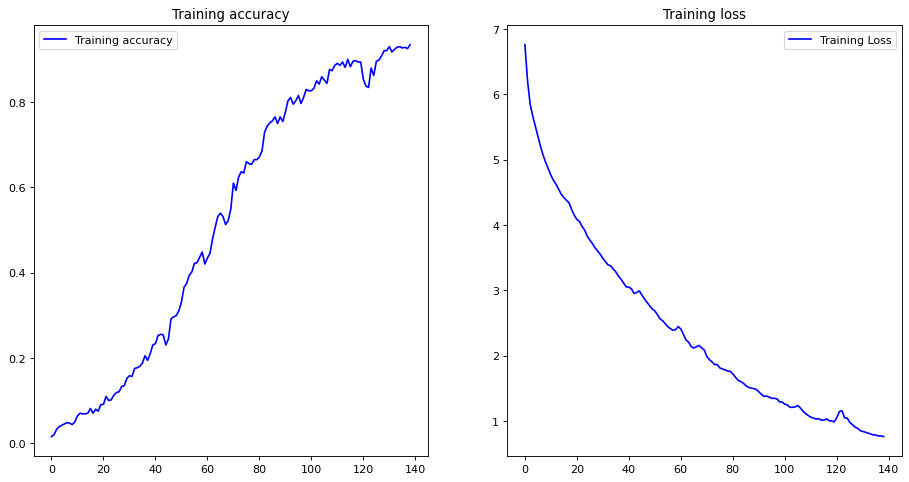

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

figure(figsize=(14, 7), dpi=80)

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [41]:
seed_text_one = "i think"
seed_text_two = "this was"
seed_text_three = "this cd"
seed_text_four = "i love"
seed_text_five = "what a"


seed_text = seed_text_one
#seed_text = seed_text_two
#seed_text = seed_text_three
#seed_text = seed_text_four
#seed_text = seed_text_five


next_words = 10

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

seed_text = (seed_text + ".").capitalize()
#print(seed_text)